# Implementing L1 and L2 regularization using sklearn

In [39]:
# https://www.geeksforgeeks.org/ml-implementing-l1-and-l2-regularization-using-sklearn/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# extra added so can use RMSE instead of R-squared
from sklearn.metrics import mean_squared_error

In [40]:
# changing the working location ot the location of the data
# cd c:\users\dev\desktop\kaggle\house prices

# loading teh data into a pandas datafram
data = pd.read_csv('..\data\kc_house_data.csv')

data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [41]:
data.shape

(21613, 21)

In [42]:
# dropping the numerically non-sensical variables
dropColumns = ['id','date','zipcode']
data = data.drop(dropColumns, axis = 1)
data = data.dropna()
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890.0,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715.0,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060.0,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050.0,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890.0,0,2003,0,47.3684,-122.031,2390,7570


In [43]:
# separating dependent and independent variables
y = data['price']
X = data.drop('price', axis = 1)

# dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state = 37
)

# Building and evaluating the different models

## Linear Regression

In [44]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,47.560046,-122.213894,1986.559576,12769.025357
std,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,0.138568,0.140831,685.416548,27305.369808
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [45]:
data.isnull().sum().sum() #double check there are no null / NAN values

0

In [46]:
data.shape #how much data has been left after cleaning

(21611, 18)

In [47]:
# building and fitting the linear regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Evaluating the linear model regression (R-squared)
print(linearModel.score(X_test, y_test))

# modified code so that it will SHOW RMSE
linearRMSE = np.sqrt(mean_squared_error(y_test,linearModel.predict(X_test)))
print(linearRMSE)

0.7061374795958223
213496.79013257392


## Ridge (L2) Regression

In [48]:
# list to maintain the different cross-validation scores
cross_val_scores_ridge = []

# list to maintain the different values of alpha
alpha = []

# loop to compute the different values of cross-validation scores
for i in range(1,9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
    
# loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i]) + ' : ' + str(cross_val_scores_ridge[i]))  

# modified code so that it will SHOW RMSE
ridgeRMSE = np.sqrt(mean_squared_error(y_test,ridgeModel.predict(X_test)))
print(ridgeRMSE)

0.25 : 69.09015837671018
0.5 : 69.09033468066409
0.75 : 69.09049125083848
1.0 : 69.0906282899928
1.25 : 69.09074599856257
1.5 : 69.09084457469044
1.75 : 69.09092421425662
2.0 : 69.0909851109089
213563.72971475357


In [49]:
# best value of alpha for the data is 2 (largest cross-validation score)

# building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.7059531759522812


## Lasso (L1) Regression

In [50]:
# list to maintain the cross-validation scores
cross_val_scores_lasso = []

# list to maintain the different values of lambda
Lambda = []

# Loop to comput the cross-validation scores
for i in range(1,19):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
    
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i]) + ' : ' + str(cross_val_scores_lasso[i]))
    
# modified code so that it will SHOW RMSE
lassoRMSE = np.sqrt(mean_squared_error(y_test,lassoModel.predict(X_test)))
print(lassoRMSE)

0.25 : 69.08996762461636
0.5 : 69.08997309354582
0.75 : 69.08997853389323
1.0 : 69.08998394768227
1.25 : 69.08998932707658
1.5 : 69.08999467945566
1.75 : 69.0900000188296
2.0 : 69.09000531192429
213501.74038939358


In [51]:
# best value of lambda for the data is 2 (largest cross-validation score)

# building and fitting the lasso regression model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.7061314316438019


# Comparing and visualizing the results

In [52]:
# building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
#scores = [linearModel.score(X_test, y_test),
#         ridgeModelChosen.score(X_test, y_test),
#         lassoModelChosen.score(X_test, y_test)]

# changed to RMSE
scores = [linearRMSE,
         ridgeRMSE,
         lassoRMSE]

# building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linearRMSE
mapping['Ridge Regression'] = ridgeRMSE
mapping['Lasso Regression'] = lassoRMSE

# printing the scores for different models
for key, val in mapping.items():
    print(str(key) + ' : ' + str(val))

Linear Regression : 213496.79013257392
Ridge Regression : 213563.72971475357
Lasso Regression : 213501.74038939358


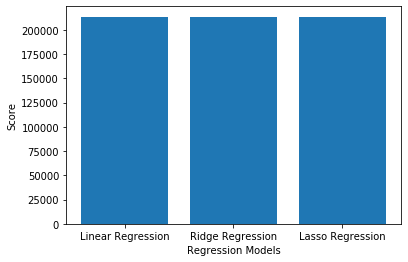

In [59]:
# plotting the scores
ax = plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.savefig('compareRegression.png', bbox_inches = 'tight')

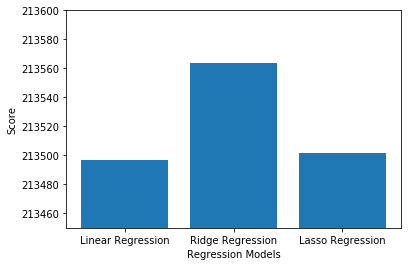

In [34]:
# plotting the scores IN DETAIL
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.ylim(213450,213600)
plt.savefig('compareRegression2.png', bbox_inches = 'tight')

In [35]:
print(list(data.columns))

print('Linear intercept: '+ str(linearModel.intercept_))
print('Linear coefficients: '+ str(linearModel.coef_))
print()
print('L1 Regularized Regression intercept: ' + str(lassoModelChosen.intercept_))
print('L1 Regularized Regression coefficients: '+ str(lassoModelChosen.coef_))

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Linear intercept: -37210386.936501995
Linear coefficients: [-3.17393582e+04  3.94845022e+04  1.04152113e+02  1.83187745e-01
  2.52140469e+03  5.32559901e+05  4.81141251e+04  3.10916005e+04
  9.56840089e+04  6.81787919e+01  3.59733209e+01 -2.34701919e+03
  2.48940358e+01  5.62264912e+05 -1.17727418e+05  3.13514422e+01
 -3.98550748e-01]

L1 Regularized Regression intercept: -37188283.31938069
L1 Regularized Regression coefficients: [-3.17382297e+04  3.94774573e+04  2.72748273e+02  1.83111060e-01
  2.52286727e+03  5.32260163e+05  4.81258393e+04  3.10824345e+04
  9.56883937e+04 -1.00415858e+02 -1.32610668e+02 -2.34736153e+03
  2.48960035e+01  5.62153138e+05 -1.17595719e+05  3.13437676e+01
 -3.98655682e-01]


{'whiskers': [<matplotlib.lines.Line2D at 0x2491b95f7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x2491b95fe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2491b95f400>],
 'medians': [<matplotlib.lines.Line2D at 0x2491b070518>],
 'fliers': [],
 'means': []}

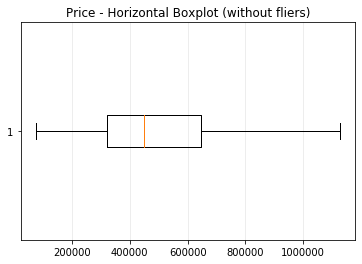

In [36]:
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Price - Horizontal Boxplot (without fliers)')
ax5.xaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5) # https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html
ax5.boxplot(data['price'], vert=False, flierprops=red_square, showfliers = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2491afe7898>,
 'caps': [<matplotlib.lines.Line2D at 0x2491b008400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2491afe7eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x2491b008ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2491b008e10>],
 'means': []}

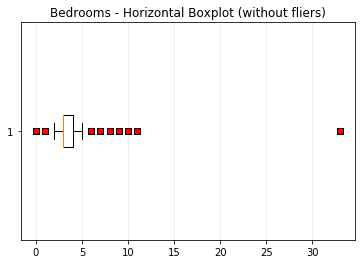

In [37]:
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Bedrooms - Horizontal Boxplot (without fliers)')
ax5.xaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5) # https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html
ax5.boxplot(data['bedrooms'], vert=False, flierprops=red_square, showfliers = True)